<a href="https://colab.research.google.com/github/KieuSonTung/Data_Preparation/blob/main/Data_Preparation_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [73]:
plt.style.use('seaborn')

## Load the dateset

In [74]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/car train.csv', sep=';')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/car test.csv', sep=';')
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


## Overview

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6000 non-null   object 
 1   year           6000 non-null   int64  
 2   selling_price  6000 non-null   int64  
 3   km_driven      6000 non-null   int64  
 4   fuel           6000 non-null   object 
 5   seller_type    6000 non-null   object 
 6   transmission   6000 non-null   object 
 7   owner          6000 non-null   object 
 8   mileage        5841 non-null   object 
 9   engine         5841 non-null   object 
 10  max_power      5846 non-null   object 
 11  torque         5840 non-null   object 
 12  seats          5841 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 609.5+ KB


Now we are dropping those null rows

In [76]:
train = train.dropna()
train = train.reset_index(drop=True)
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   object 
 9   engine         5840 non-null   object 
 10  max_power      5840 non-null   object 
 11  torque         5840 non-null   object 
 12  seats          5840 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 593.2+ KB


We are modifying some fields 

## Brand

In [78]:
train['brand'] = train['name'].apply(lambda x: x.split()[0])
train.brand.value_counts()

Maruti           1733
Hyundai           997
Mahindra          585
Tata              535
Toyota            339
Honda             334
Ford              281
Chevrolet         170
Renault           164
Volkswagen        135
BMW                82
Skoda              76
Nissan             60
Jaguar             52
Volvo              50
Datsun             49
Mercedes-Benz      44
Fiat               34
Audi               30
Lexus              27
Jeep               23
Mitsubishi         12
Land                6
Isuzu               5
Force               5
Kia                 4
Ambassador          3
Daewoo              2
Ashok               1
Opel                1
MG                  1
Name: brand, dtype: int64

In [79]:
asia_car = ['Maruti', 'Hyundai', 'Toyota', 'Tata', 'Honda', 'Nissan', 'Datsun', 
            'Mitsubishi', 'Isuzu', 'Kia', 'Daewoo']
train['brand'] = train['name'].apply(lambda x: 'Asia' if x.split()[0] in asia_car else 'Euro')
'''
1: Asia brand
2: Euro brand
'''
train.brand.value_counts()

Asia    4070
Euro    1770
Name: brand, dtype: int64

In [80]:
Brand = train[['brand']]
Brand = pd.get_dummies(Brand, drop_first=True)
Brand.head()

,brand_Euro
0,0
1,0
2,0
3,0
4,1


## Mileage

In [81]:
train['mileage_unit'] = train['mileage'].apply(lambda x: x.split()[1])
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,mileage_unit
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0,Asia,kmpl
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0,Asia,kmpl
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0,Asia,kmpl
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0,Asia,kmpl
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,Euro,kmpl


In [82]:
train.mileage_unit.value_counts()

kmpl     5774
km/kg      66
Name: mileage_unit, dtype: int64

We can see that some observations have different measuring units, so we have to convert them 

In [83]:
train['new_mileage'] = train['mileage'].apply(lambda x: float(x.split()[0]) if str(x).endswith('kmpl') else float(x.split()[0]) * 1.4) 
train.drop(columns=['mileage_unit', 'mileage'], inplace=True)
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,torque,seats,brand,new_mileage
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0,Asia,21.50
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0,Asia,21.19
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0,Asia,12.55
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0,Asia,17.01
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,1969 CC,190 bhp,400Nm,5.0,Euro,18.00


## Torque

In [84]:
a = np.array(train['torque'].apply(lambda x: x.split()[0]))
for i in a[:5]:
    print(i)


260Nm@
219.66nm@
360Nm@
154.9Nm@
400Nm


Since there are a lot of variations and some observations don't have measuring unit so we are going to drop **torque** column

In [85]:
train.drop(columns='torque', inplace=True)
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats,brand,new_mileage
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,1497 CC,108.5 bhp,5.0,Asia,21.50
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,1396 CC,88.76 bhp,5.0,Asia,21.19
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,2982 CC,168.5 bhp,7.0,Asia,12.55
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,1591 CC,121.3 bhp,5.0,Asia,17.01
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,1969 CC,190 bhp,5.0,Euro,18.00


## Year

In [86]:
train['year'].value_counts().sort_index()

1994      1
1995      1
1996      2
1997      8
1998      6
1999      8
2000     10
2001      5
2002     17
2003     28
2004     39
2005     56
2006     72
2007    124
2008    150
2009    156
2010    277
2011    431
2012    461
2013    492
2014    469
2015    571
2016    628
2017    746
2018    608
2019    425
2020     49
Name: year, dtype: int64

In [90]:
train['class_year'] = train['year'].apply(lambda x: 'before_2015' if x <= 2015 else 'after_2015')
train['class_year'].value_counts()

before_2015    3384
after_2015     2456
Name: class_year, dtype: int64

In [96]:
Year = train[['class_year']]
Year = pd.get_dummies(Year, drop_first=True)
Year.head()

,class_year_before_2015
0,0
1,0
2,1
3,1
4,0


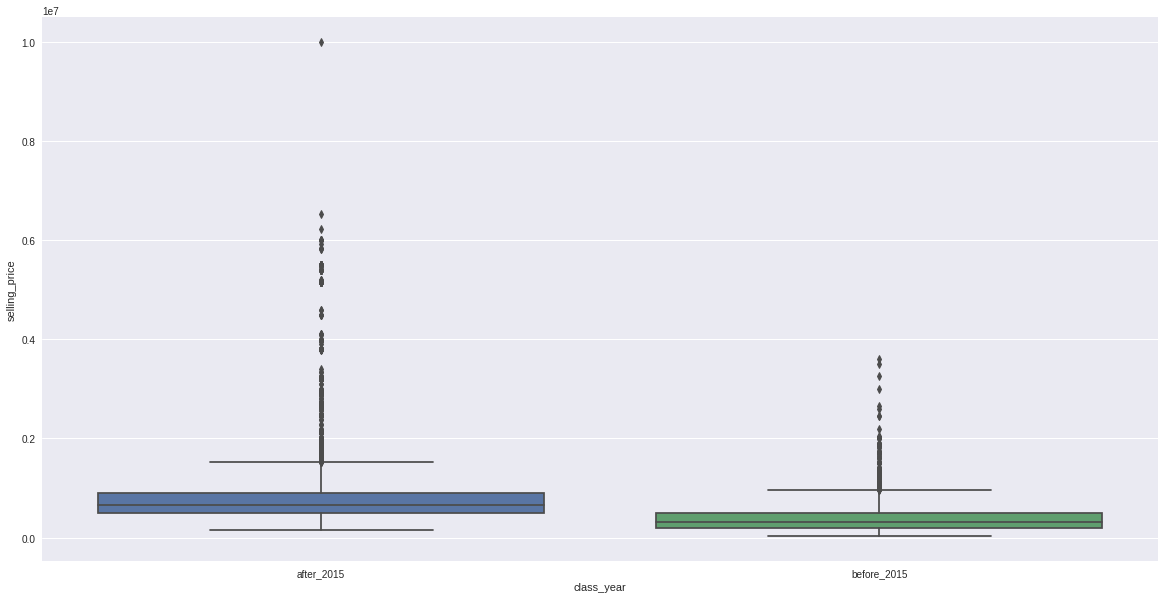

In [91]:
# Year/ Price

fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(x='class_year', y='selling_price', data=train)
locs, labels = plt.xticks()
plt.show()

## Fuel


In [89]:
train['fuel'].value_counts()

Diesel    3192
Petrol    2582
CNG         41
LPG         25
Name: fuel, dtype: int64

In [93]:
train = train[~train.fuel.str.contains('CNG')]
train = train[~train.fuel.str.contains('LPG')]
train.fuel.value_counts()

Diesel    3192
Petrol    2582
Name: fuel, dtype: int64

In [97]:
Fuel = train[['fuel']]
Fuel = pd.get_dummies(Fuel, drop_first=True)
Fuel.head()

,fuel_Petrol
0,0
1,0
2,0
3,1
4,0


In [98]:
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats,brand,new_mileage,class_year
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,1497 CC,108.5 bhp,5.0,Asia,21.50,after_2015
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,1396 CC,88.76 bhp,5.0,Asia,21.19,after_2015
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,2982 CC,168.5 bhp,7.0,Asia,12.55,before_2015
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,1591 CC,121.3 bhp,5.0,Asia,17.01,before_2015
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,1969 CC,190 bhp,5.0,Euro,18.00,after_2015


## Seller Type

In [99]:
train.seller_type.value_counts()

Individual          4794
Dealer               806
Trustmark Dealer     174
Name: seller_type, dtype: int64

In [ ]:
train['seller_type']